# TUGAS DATA ANALYTICS

Link Dataset : [Link Kaggle Amazon](https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [2]:
# Read Data file CSV
df = pd.read_csv("amazon_prime_titles.csv")

### Cleaning Data

In [4]:
# Menghapus kolom country dan date_added
df_cleaned = df.drop(columns=['country', 'date_added'])

# Menghapus baris yang kolom 'director'-nya memiliki missing value
df_cleaned = df_cleaned.dropna(subset=['director'])

# Menampilkan 5 baris pertama dari dataset yang telah dibersihkan
print(df_cleaned.head())

# Export menjadi Cleaned Data
df_cleaned.to_csv('cleaned_amazon_prime_dataset.csv', index=False)

  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast  release_year rating  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          2014    NaN   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar          2018    13+   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...          2017    NaN   
3  Interviews with: Pink, Adele, Beyoncé, Britney...          2014    NaN   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...          1989    NaN   

  duration                listed_in  \
0  113 min            Comedy, Drama   
1  110 min     Drama, International   
2   74 min  Action, Drama, Suspense   
3   69 min              Document

### Visualization

Highest amount of movies and TV Shows in the past 10 years 

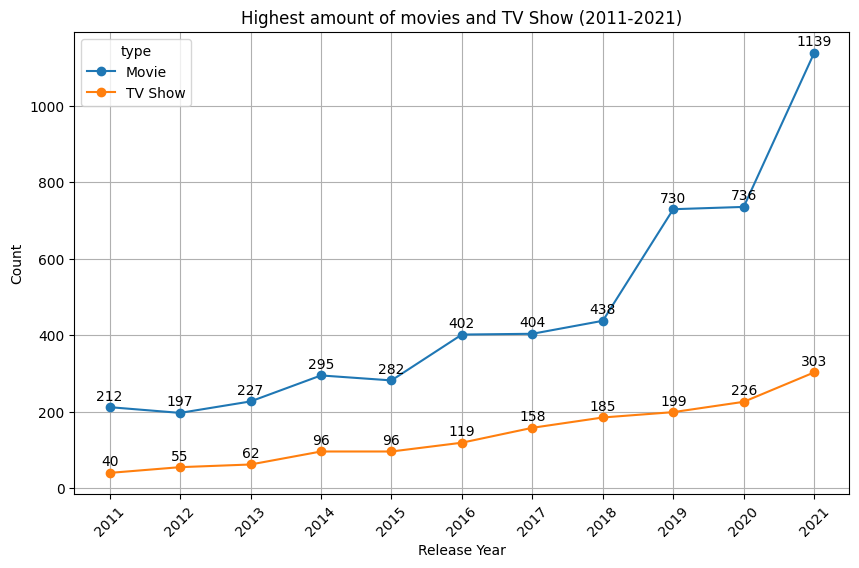

In [29]:
# Filter data untuk 10 tahun terakhir (2021 ke belakang)
df_last_10_years = df[df['release_year'] >= 2011]

# Menghitung jumlah "Movie" dan "TV Show" per tahun
type_count = df_last_10_years.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Plot Line Chart
ax = type_count.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Highest amount of movies and TV Show (2011-2021)')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(range(2011, 2022), rotation=45)
plt.grid(True)

# Menambahkan nilai setiap titik pada grafik
for i in range(type_count.shape[0]):
    for col in type_count.columns:
        plt.annotate(str(type_count.iloc[i][col]), 
                      xy=(type_count.index[i], type_count.iloc[i][col]), 
                      textcoords="offset points", 
                      xytext=(0,5), 
                      ha='center')

plt.show()

Top 10 Genre on Amazon Prime

C:\Users\mukhl\AppData\Local\Temp\ipykernel_3628\2119815837.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genres), y=list(counts), palette=colors)


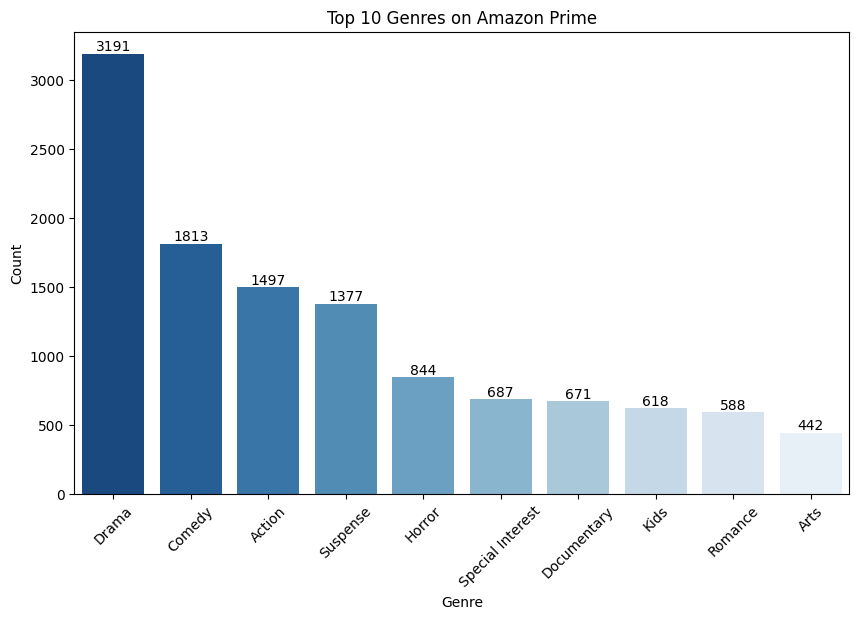

In [21]:
# Memproses genre
all_genres = df_cleaned['listed_in'].str.split(',').apply(lambda x: [genre.strip() for genre in x]).explode()
genre_counts = Counter(all_genres)

# Mendapatkan 10 genre teratas
top_genres = genre_counts.most_common(10)
genres, counts = zip(*top_genres)

# Membuat gradasi warna biru
colors = sns.color_palette("Blues", len(genres))[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=list(genres), y=list(counts), palette=colors)
plt.title('Top 10 Genres on Amazon Prime')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Menambahkan nilai pada setiap bar
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.show()

Top 10 Directors by Number of Titles on Amazon Prime

C:\Users\mukhl\AppData\Local\Temp\ipykernel_3628\996809029.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.index[:10], y=director_counts.values[:10], palette=colors)


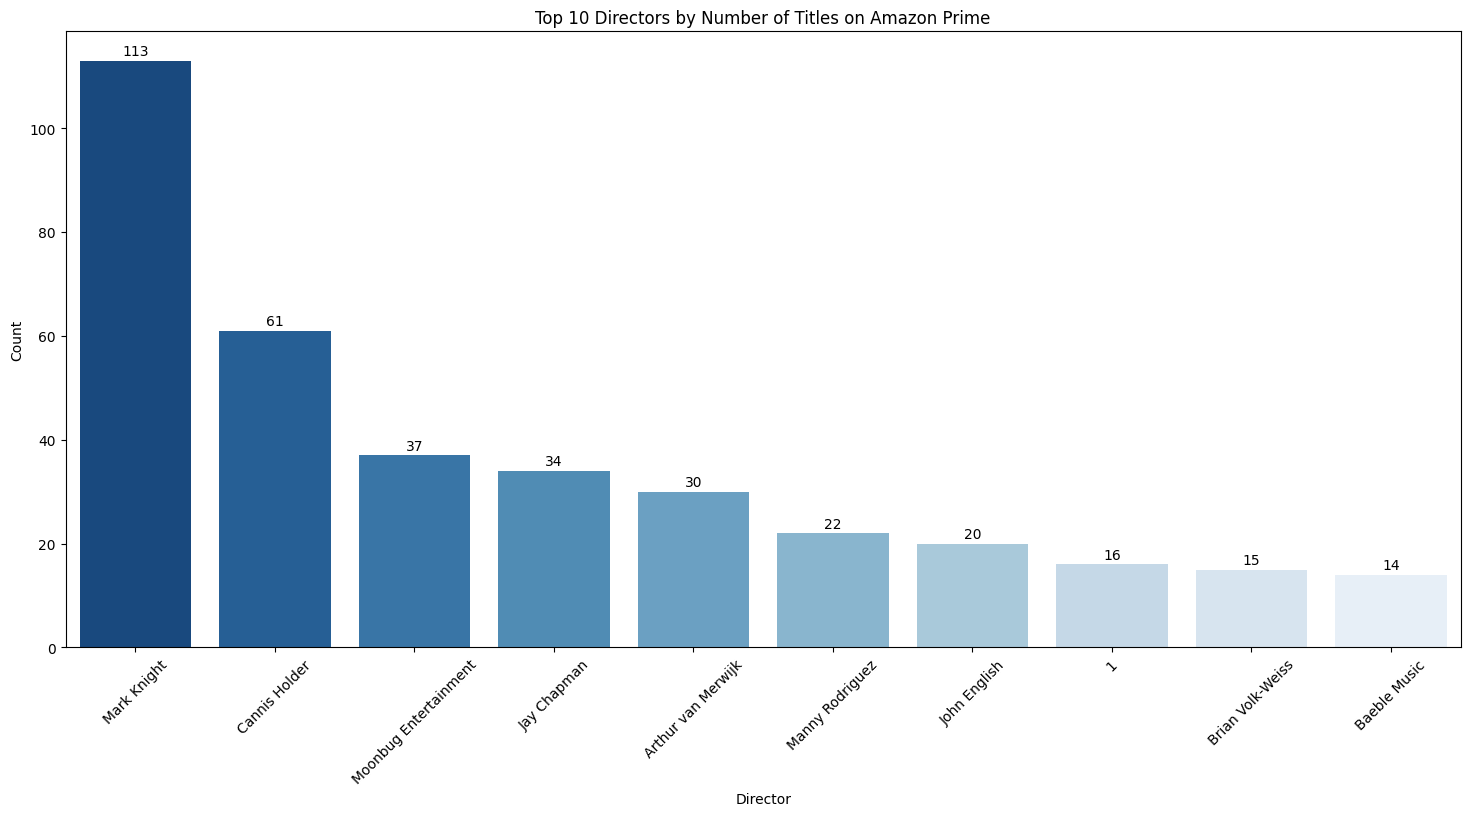

In [28]:
# Menghitung jumlah title per director
director_counts = df_cleaned['director'].value_counts()

# Membuat gradasi warna biru dan membalikkan urutan warnanya
colors = sns.color_palette("Blues", 10)[::-1]

plt.figure(figsize=(18, 8))
sns.barplot(x=director_counts.index[:10], y=director_counts.values[:10], palette=colors)
plt.title('Top 10 Directors by Number of Titles on Amazon Prime')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Menambahkan nilai pada setiap bar
for i, count in enumerate(director_counts.values[:10]):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.show()